In [1]:
import pandas as pd

# Definisikan beberapa gejala dan probabilitasnya
symptoms = [
    {'Gejala': 'Daun Kuning', 'Probabilitas': 0.6},
    {'Gejala': 'Bercak Hitam', 'Probabilitas': 0.7},
    {'Gejala': 'Gugur Daun', 'Probabilitas': 0.5}
]

# Definisikan beberapa penyakit dan tambahkan keyakinan terhadap gejala
disease1_beliefs = [
    {'Penyakit': 'Penyakit Karat Daun', 'Gejala': 'Daun Kuning', 'Bobot': 0.6},
    {'Penyakit': 'Penyakit Karat Daun', 'Gejala': 'Bercak Hitam', 'Bobot': 0.4}
]

disease2_beliefs = [
    {'Penyakit': 'Penyakit Jamur', 'Gejala': 'Bercak Hitam', 'Bobot': 0.5},
    {'Penyakit': 'Penyakit Jamur', 'Gejala': 'Gugur Daun', 'Bobot': 0.5}
]

# Konversi ke DataFrame
df_symptoms = pd.DataFrame(symptoms)
df_disease1 = pd.DataFrame(disease1_beliefs)
df_disease2 = pd.DataFrame(disease2_beliefs)


In [2]:
from IPython.display import display

display(df_symptoms)
display(df_disease1)
display(df_disease2)


,Gejala,Probabilitas
0,Daun Kuning,0.6
1,Bercak Hitam,0.7
2,Gugur Daun,0.5


,Penyakit,Gejala,Bobot
0,Penyakit Karat Daun,Daun Kuning,0.6
1,Penyakit Karat Daun,Bercak Hitam,0.4


,Penyakit,Gejala,Bobot
0,Penyakit Jamur,Bercak Hitam,0.5
1,Penyakit Jamur,Gugur Daun,0.5


In [6]:
def get_mass(disease_beliefs):
    mass = {}
    for belief in disease_beliefs:
        symptom = belief['Gejala']
        weight = belief['Bobot']
        probability = next(item for item in symptoms if item['Gejala'] == symptom)['Probabilitas']
        mass[symptom] = mass.get(symptom, 0) + probability * weight
    return mass

mass1 = get_mass(disease1_beliefs)
mass2 = get_mass(disease2_beliefs)

display("Mass Penyakit Karat Daun:", mass1)
display("Mass Penyakit Jamur:", mass2)


'Mass Penyakit Karat Daun:'

{'Daun Kuning': 0.36, 'Bercak Hitam': 0.27999999999999997}

'Mass Penyakit Jamur:'

{'Bercak Hitam': 0.35, 'Gugur Daun': 0.25}

In [7]:
def combine_beliefs(mass1, mass2):
    combined_mass = {}
    for s1, m1 in mass1.items():
        for s2, m2 in mass2.items():
            if s1 == s2:
                combined_mass[s1] = combined_mass.get(s1, 0) + m1 * m2
            else:
                combined_mass[s1 + '|' + s2] = combined_mass.get(s1 + '|' + s2, 0) + m1 * m2

    normalized_mass = {}
    total_mass = sum(combined_mass.values())
    for key in combined_mass:
        normalized_mass[key] = combined_mass[key] / total_mass
    return normalized_mass

combined_mass = combine_beliefs(mass1, mass2)

display("Mass Kombinasi:", combined_mass)


'Mass Kombinasi:'

{'Daun Kuning|Bercak Hitam': 0.328125,
 'Daun Kuning|Gugur Daun': 0.234375,
 'Bercak Hitam': 0.2552083333333333,
 'Bercak Hitam|Gugur Daun': 0.18229166666666666}

Penyakit yang terdeteksi berdasarkan gejala: Daun Kuning


,Kemungkinan Penyakit,Nilai Dempster-Shafer
0,Daun Kuning|Bercak Hitam,0.328125
1,Daun Kuning|Gugur Daun,0.234375
2,Bercak Hitam,0.255208
3,Bercak Hitam|Gugur Daun,0.182292


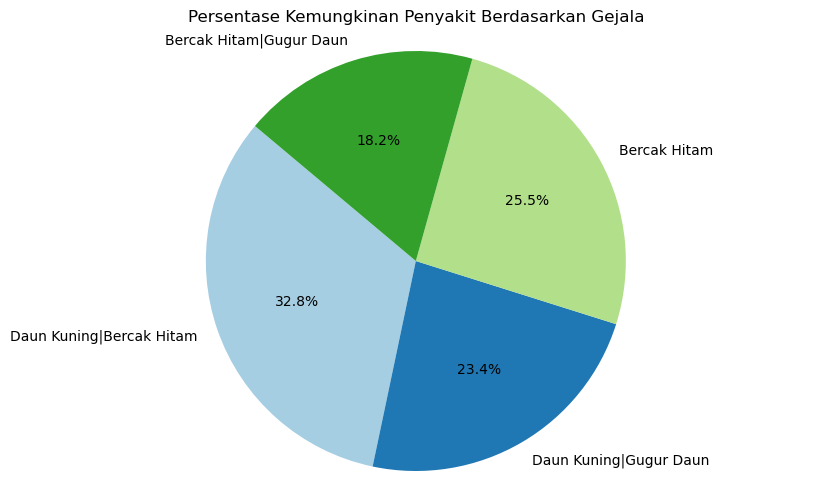

In [8]:
import matplotlib.pyplot as plt

# Interpretasi hasil
max_belief = max(combined_mass, key=combined_mass.get)
print(f"Penyakit yang terdeteksi berdasarkan gejala: {max_belief.split('|')[0]}")

# Buat tabel persentase kemungkinan dan nilai Dempster-Shafer
df_combined_mass = pd.DataFrame(list(combined_mass.items()), columns=['Kemungkinan Penyakit', 'Nilai Dempster-Shafer'])
display(df_combined_mass)

# Buat grafik persentase pie chart
labels = df_combined_mass['Kemungkinan Penyakit']
values = df_combined_mass['Nilai Dempster-Shafer']

plt.figure(figsize=(10, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Persentase Kemungkinan Penyakit Berdasarkan Gejala')
plt.axis('equal')
plt.show()
